In [2]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [3]:
os.getcwd()

'/home/student/Dokumente/moonsoon_nepal'

In [34]:
streak = 6
src = os.path.join(os.getcwd(), 'moonsoon_src','moonsoon with streak of {}'.format(streak))
path = os.path.join(src, '*.txt')
files = glob.glob(path)
for file in files:
    print(file)
    df = pd.read_csv(file)
    df
    df['duration'] = df.lastday - df.firstday
    break

/home/student/Dokumente/moonsoon_nepal/moonsoon_src/moonsoon with streak of 6/3276_I_1.txt


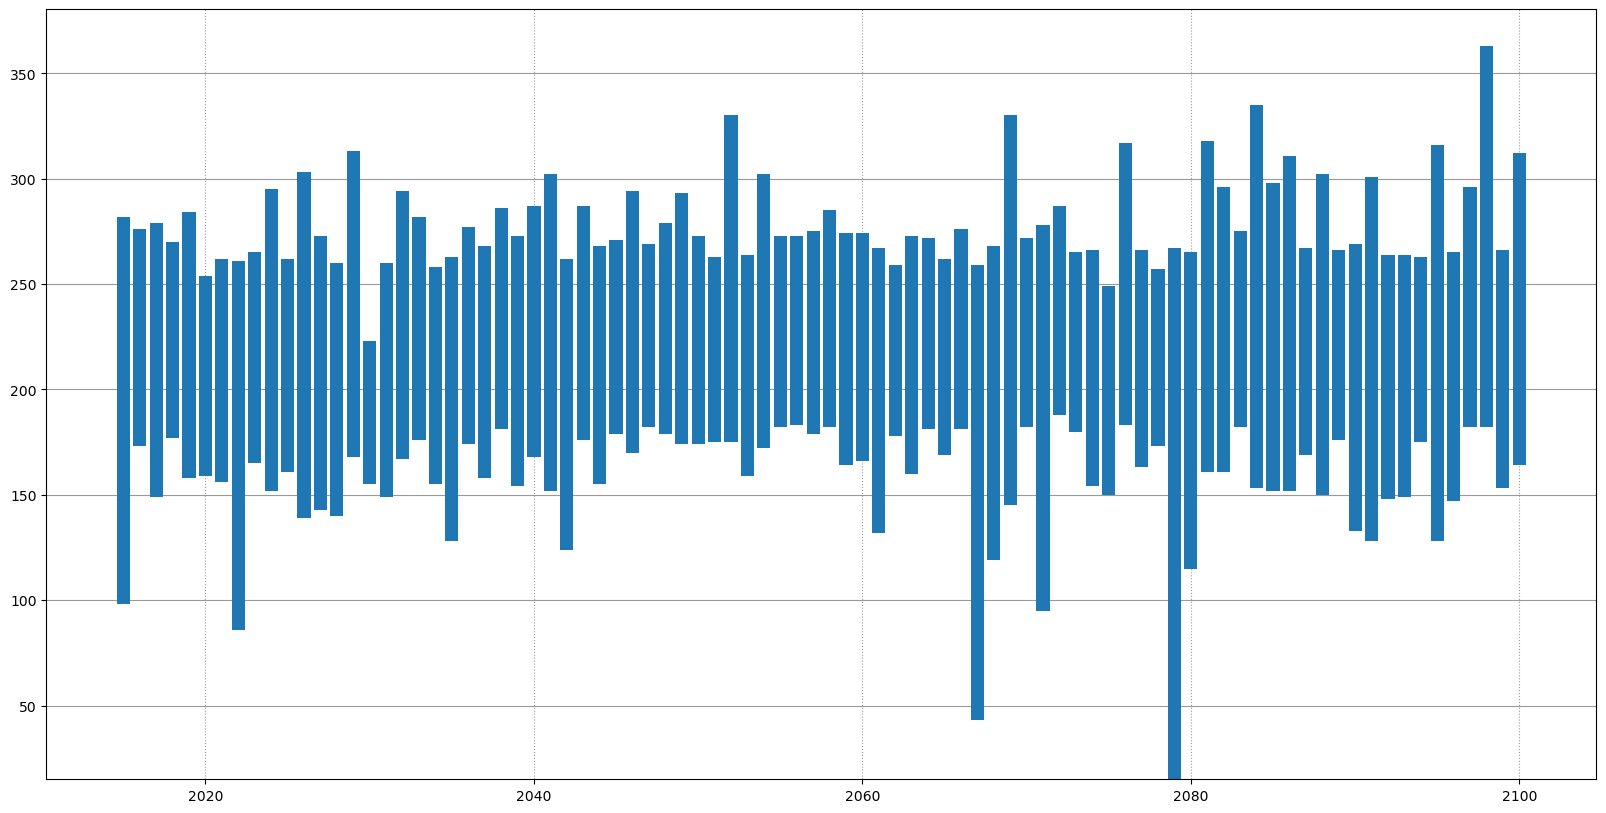

In [113]:
fig, ax = plt.subplots(1, figsize=(20,10))
ax.bar(df.year, df.duration, bottom = df.firstday)
ax.set_axisbelow(True)
ax.yaxis.grid(color='k', linestyle='solid', alpha=0.4, which='both')
ax.xaxis.grid(color='k', linestyle='dotted', alpha=0.4, which='both')

# #ticks
# yticks = np.arange(0, 365, 30)
# yticks_labels = np.arange(0, 365, 30)
# yticks_minor = np.arange(0, 365, 30)
# ax.set_yticks(yticks)
# ax.set_yticks(yticks_minor, minor=True)
# ax.set_yticklabels(yticks_labels, color='black')
# ax.set_xticks(df.year)
plt.show()

In [87]:
def get_df(file):
    df = pd.read_csv(file)
    df.drop(df[df.firstday == 'False'].index, axis = 0, inplace = True)
    df.firstday =  pd.to_numeric(df.firstday)
    df.lastday = pd.to_numeric(df.lastday)
    df['duration'] = df.lastday - df.firstday
    return df
    

In [75]:
def get_plot(df, titel):
    #PLOT PROPERTIES
    fig, ax = plt.subplots(1, figsize=(20,10))
    ax.plot(df.year, df.firstday, 'x', label = "first day")
    ax.plot(df.year, df.lastday, 'x', label = "last day")
    ax.set_ylim([0, 366])
    plt.xticks(np.arange(min(df.year), max(df.year)+1, 10))
    plt.yticks(np.arange(0, 367, 30))
    ax.yaxis.grid(color='k', linestyle='solid', alpha=0.4, which='both')
    ax.xaxis.grid(color='k', linestyle='dotted', alpha=0.4, which='both')
    plt.fill_between(df.year,df.firstday, df.lastday, alpha=0.2)
    plt.legend()
    plt.title(titel)
    return fig

In [76]:
def save_plot(file, df):
    path = os.path.normpath(file)
    path_components = path.split(os.sep) #a list
    output_dir = os.path.join(os.getcwd(),'output',path_components[-2])
    data_name = os.path.splitext(path_components[-1])[0]
    output_path = os.path.join(output_dir, data_name + '.png')
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    get_plot(df, data_name).savefig(output_path)
    

In [ ]:
for streak in range(6,13):
    src = os.path.join(os.getcwd(), 'moonsoon_src','moonsoon with streak of {}'.format(streak))
    path = os.path.join(src, '*.txt')
    files = glob.glob(path)
    for file in files:
        df = get_df(file)
        df['duration'] = df.lastday - df.firstday
        save_plot(file, df)

/tmp/ipykernel_47558/2258582669.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, figsize=(20,10))


In [82]:
with pd.option_context('display.max_rows', None):
    print(df)

    year  firstday  lastday  duration
0   2015       126      258       132
1   2016        94      356       262
2   2017        77      250       173
3   2018        72      201       129
4   2019       101      259       158
5   2020       142      257       115
6   2021        60      279       219
7   2022       126      270       144
8   2023       109      272       163
9   2024        92      362       270
10  2025       101      250       149
11  2026        82      264       182
12  2027       108      256       148
13  2028        97      264       167
14  2029       126      250       124
15  2030       137      276       139
16  2031       118      246       128
17  2032        83      257       174
18  2033       124      356       232
19  2034        90      274       184
20  2035       120      273       153
21  2036       156      260       104
22  2037        93      266       173
23  2038       160      271       111
24  2039       117      259       142
25  2040    

In [86]:
pd.to_numeric(df.firstday)

TypeError: to_numeric() got an unexpected keyword argument 'inplace'